### **Proyecto Final de RNN:** Predicción de Precios Inmobiliarios en Bogotá: Un Enfoque Basado en Redes Neuronales Artificiales
----
#### **Redes Neuronales Artificiales**
#### Maestría en Analítica de Datos
##### ***Docente:*** Diego Roldan
##### ***Estudiantes:*** Juan Gómez M., Fabio Navarrete M., Sebastian Gómez A.
##### Universidad Central

#### **Origen de los datos**

Los datos de ofertas inmobiliarias provienen de un proceso de web scraping realizado sobre la página fincaraiz.com, un reconocido portal de bienes raíces en Colombia. Esta información específica corresponde a la ciudad de Bogotá y fue extraída el martes 12 de noviembre. Durante la recolección, se obtuvieron un total de 218,613 registros, proporcionando una amplia muestra de las ofertas disponibles en el mercado inmobiliario de la capital colombiana en esa fecha.

Repositorio del proyecto: https://drive.google.com/file/d/1iPR6fQekAEWHlAUNKiVxfIrhu8Oi4XzT/view?usp=drive_link



####**Fase 1:** Preparación del Entorno y los Datos

In [1]:
# Instalación de bibliotecas necesarias.
!pip install pandas pyarrow openpyxl
!pip install visualkeras
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
# Librerías de análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# Preprocesamiento y evaluación de sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator

# TensorFlow/Keras para el diseño de RNA
import visualkeras as vk
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers, Input
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError

# Montar Google Drive para acceder a archivos.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Especificar la ruta del archivo Parquet alojado en Google Drive.
ruta = '/content/drive/MyDrive/Redes Neuronales/Trabajo Final/Proyecto_Final/20241112_TD_ofertas_fr_11001.parquet'

# Cargar el dataset en un DataFrame de pandas.
conver = pd.read_parquet(ruta)

# Mostrar la estructura básica del DataFrame.
print("Información del dataset:")
conver.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 41101 entries, 0 to 218613
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_oferta_fr             41101 non-null  object        
 1   fuente                   41101 non-null  object        
 2   url                      41101 non-null  object        
 3   ubicacion_principal      41101 non-null  object        
 4   ubicaciones_asociadas    41101 non-null  object        
 5   m2apto                   41101 non-null  float64       
 6   location_point           41101 non-null  object        
 7   valor                    41101 non-null  int64         
 8   tipo_oferta              41101 non-null  object        
 9   direccion                41101 non-null  object        
 10  created_at               41101 non-null  datetime64[ns]
 11  updated_at               41101 non-null  datetime64[ns]
 12  description

In [4]:
# Análisis inicial del dataset: dimensiones, columnas y valores faltantes.
print("\nDimensiones del dataset:", conver.shape)
print("\nValores faltantes por columna:\n", conver.isnull().sum())


Dimensiones del dataset: (41101, 30)

Valores faltantes por columna:
 id_oferta_fr                   0
fuente                         0
url                            0
ubicacion_principal            0
ubicaciones_asociadas          0
m2apto                         0
location_point                 0
valor                          0
tipo_oferta                    0
direccion                      0
created_at                     0
updated_at                     0
description                    0
estado                     36463
tipo_inmueble              41101
estrato                       61
parqueaderos               10532
financiacion               41050
formas_de_pago             41083
pisos_interiores           27115
tipo_de_inmueble             101
banos                       1381
area_construida              103
area_privada                4752
antiguedad                 13110
habitaciones                 392
antiguedad_del_inmueble    30679
administracion             17903
piso_

In [5]:
# Combinar columnas 'antiguedad' y 'antiguedad_del_inmueble'.
conver['antiguedad'] = conver['antiguedad'].fillna(conver['antiguedad_del_inmueble'])

In [6]:
# Seleccionar columnas relevantes.
columnas_entradas = [
    'm2apto', 'tipo_oferta', 'estrato', 'parqueaderos', 'pisos_interiores',
    'tipo_de_inmueble', 'banos', 'area_construida', 'area_privada',
    'antiguedad', 'habitaciones', 'administracion', 'piso_ndeg', 'valor'
]
data = conver[columnas_entradas]

In [7]:
# Eliminar registros con tipo_de_inmueble nulo (por ser construcciones múltiples).
data = data.dropna(subset=['tipo_de_inmueble'])

In [8]:
# Rellenar valores faltantes.
data['parqueaderos'] = data['parqueaderos'].fillna(0)
data['pisos_interiores'] = data['pisos_interiores'].fillna(0)
data['banos'] = data['banos'].fillna(1)  # Asumir mínimo un baño.
data['administracion'] = data['administracion'].fillna(0)
data['piso_ndeg'] = data['piso_ndeg'].fillna(0)

In [9]:
# Eliminar registros con valores nulos en columnas críticas.
data = data.dropna(subset=['area_construida', 'estrato', 'habitaciones', 'area_privada', 'antiguedad'])

In [10]:
# Eliminar filas donde tipo_oferta es "Arriendo".
data = data[data['tipo_oferta'] != 'Arriendo']
data = data.drop(['tipo_oferta', 'm2apto'], axis=1)  # Eliminar columnas irrelevantes.

In [11]:
# Codificar variables categóricas.
data = pd.get_dummies(data, columns=['tipo_de_inmueble'], drop_first=True)

In [12]:
# Limpiar y convertir columnas de área.
for col in ['area_construida', 'area_privada']:
    data[col] = data[col].str.strip().str.replace(' m2', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [13]:
# Mapear valores de antigüedad a números.
antiguedad_mapping = {
    'menor a 1 año': 1,
    '1 a 8 años': 2,
    '9 a 15 años': 3,
    '16 a 30 años': 4,
    'más de 30 años': 5
}
data['antiguedad'] = data['antiguedad'].map(antiguedad_mapping)

In [14]:
# Convertir valores categóricos a enteros.
if 'tipo_de_inmueble_Casa' in data.columns:
    data['tipo_de_inmueble_Casa'] = data['tipo_de_inmueble_Casa'].astype(int)

In [15]:
# Identificar valores únicos en la columna 'administracion' antes de la conversión
print("\nValores únicos antes de la conversión en 'administracion':")
print(data['administracion'].unique())

# Reemplazar caracteres no numéricos (como comas) y valores faltantes
data['administracion'] = data['administracion'].replace({',': ''}, regex=True)

# Manejar valores faltantes reemplazándolos por 0
data['administracion'] = data['administracion'].replace('', '0').astype(float)


Valores únicos antes de la conversión en 'administracion':
['420,000.00' '80,000.00' 0 ... '1,107,000.00' '479,739.00' '2,097,000.00']


In [16]:
# Detección y eliminación de outliers
def filter_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Filtra outliers de un DataFrame utilizando el rango intercuartílico (IQR).
    """
    Q1 = np.percentile(data["valor"], 25)
    Q3 = np.percentile(data["valor"], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data["valor"] >= lower_bound) & (data["valor"] <= upper_bound)]
    outliers = data[(data["valor"] < lower_bound) | (data["valor"] > upper_bound)]
    return filtered_data, outliers

In [17]:
# Filtrar iterativamente hasta eliminar todos los outliers.
con_outlayer = True
data_copy = data.copy()
while con_outlayer:
    data_filter, outliers = filter_data(data_copy)
    if len(outliers) == 0:
        con_outlayer = False
    else:
        data_copy = data_filter

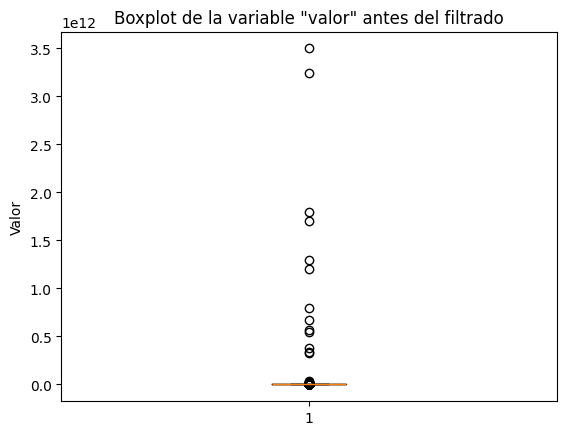

In [18]:
# Visualizar boxplots antes y después del filtrado.
plt.boxplot(data['valor'])
plt.title('Boxplot de la variable "valor" antes del filtrado')
plt.ylabel('Valor')
plt.show()

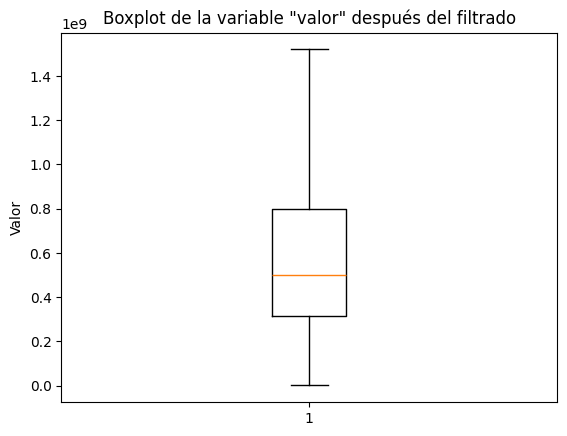

In [19]:
plt.boxplot(data_filter['valor'])
plt.title('Boxplot de la variable "valor" después del filtrado')
plt.ylabel('Valor')
plt.show()

In [20]:
# Revisar valores extremos para ciertas variables.
thresholds = {
    'estrato': (1, 6),
    'parqueaderos': (0, 15),
    'pisos_interiores': (0, 15),
    'banos': (1, 15),
    'piso_ndeg': (0, 50),
    'area_construida': (10, 100000),
    'area_privada': (10, 100000),
}

# Recortar valores fuera de los umbrales.
for col, (min_val, max_val) in thresholds.items():
    data_filter = data_filter[(data_filter[col] >= min_val) & (data_filter[col] <= max_val)]

In [21]:
# Resultados finales del preprocesamiento
print(f"Datos finales: {data_filter.shape}")
print(f"Porcentaje de datos reducidos: {(1 - data_filter.shape[0] / data.shape[0]) * 100:.2f}%")

Datos finales: (16894, 12)
Porcentaje de datos reducidos: 15.64%


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20025 entries, 0 to 218613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   estrato                20025 non-null  float64
 1   parqueaderos           20025 non-null  float64
 2   pisos_interiores       20025 non-null  float64
 3   banos                  20025 non-null  float64
 4   area_construida        20025 non-null  float64
 5   area_privada           20025 non-null  float64
 6   antiguedad             20025 non-null  int64  
 7   habitaciones           20025 non-null  float64
 8   administracion         20025 non-null  float64
 9   piso_ndeg              20025 non-null  float64
 10  valor                  20025 non-null  int64  
 11  tipo_de_inmueble_Casa  20025 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 2.0 MB


####**Fase 2:** Análisis Exploratorio y Preprocesamiento de Datos

In [23]:
# Resumen estadístico del dataset.
print("\nResumen estadístico de las variables numéricas:")
print(data_filter.describe())


Resumen estadístico de las variables numéricas:
            estrato  parqueaderos  pisos_interiores         banos  \
count  16894.000000  16894.000000      16894.000000  16894.000000   
mean       4.177578      1.261335          1.534391      2.480526   
std        1.232064      1.001485          2.762073      1.170614   
min        1.000000      0.000000          0.000000      1.000000   
25%        3.000000      1.000000          0.000000      2.000000   
50%        4.000000      1.000000          0.000000      2.000000   
75%        5.000000      2.000000          2.000000      3.000000   
max        6.000000     11.000000         15.000000     13.000000   

       area_construida  area_privada    antiguedad  habitaciones  \
count     16894.000000  16894.000000  16894.000000  16894.000000   
mean        121.427422    119.780902      3.594353      3.054457   
std         245.967883    224.652783      1.170715      1.603249   
min          17.000000     10.000000      1.000000      1

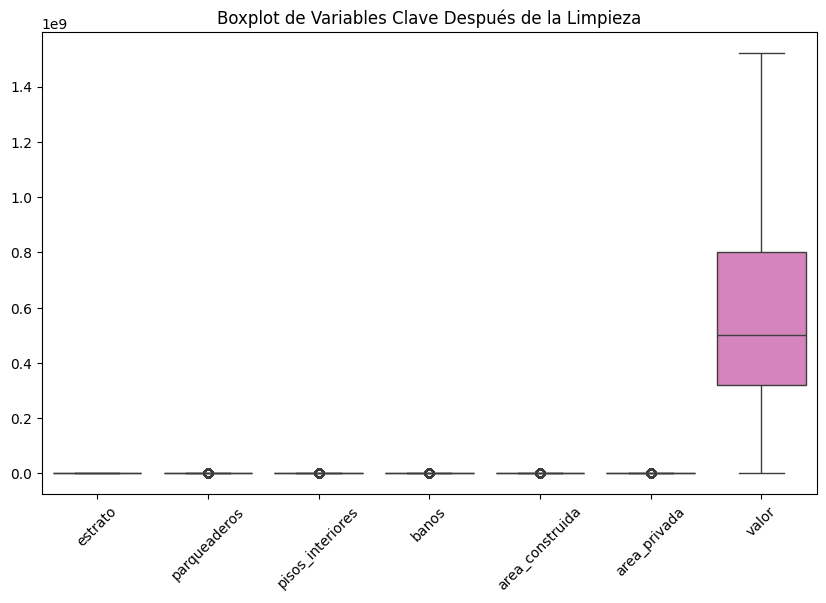

In [24]:
# Visualización después de la limpieza.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filter[['estrato', 'parqueaderos', 'pisos_interiores', 'banos',
                              'area_construida', 'area_privada', 'valor']])
plt.title("Boxplot de Variables Clave Después de la Limpieza")
plt.xticks(rotation=45)
plt.show()

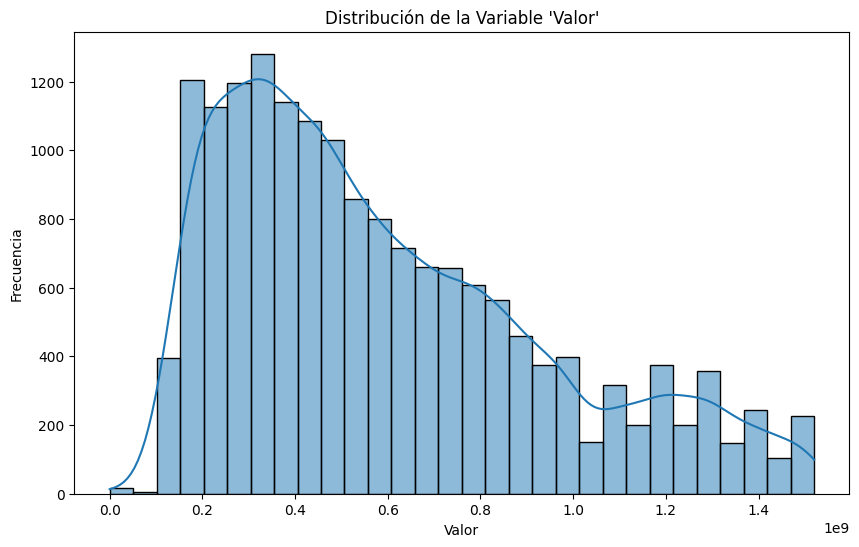

In [25]:
# Distribución de la variable objetivo ("valor").
plt.figure(figsize=(10, 6))
sns.histplot(data_filter['valor'], kde=True, bins=30)
plt.title("Distribución de la Variable 'Valor'")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [26]:
# Transformar la variable objetivo utilizando logaritmo natural.
data_filter['valor'] = np.log1p(data_filter['valor'])

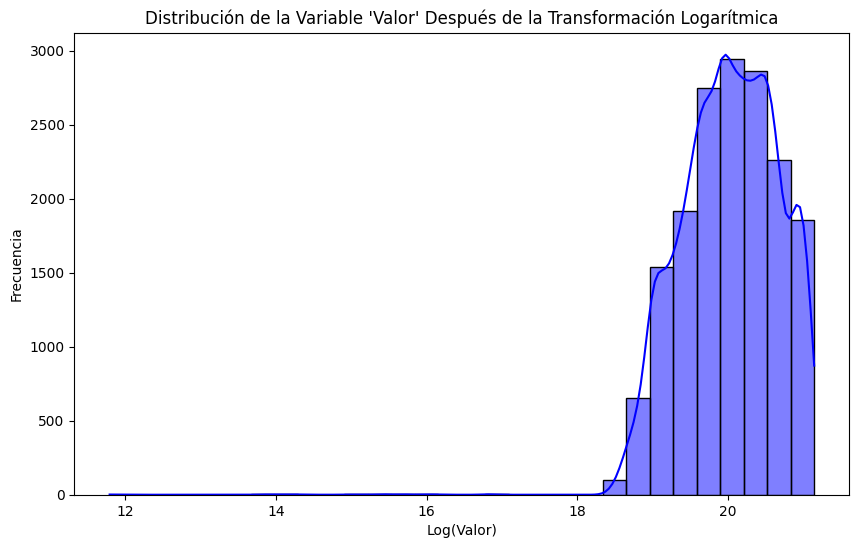

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data_filter['valor'], kde=True, bins=30, color='blue')
plt.title("Distribución de la Variable 'Valor' Después de la Transformación Logarítmica")
plt.xlabel("Log(Valor)")
plt.ylabel("Frecuencia")
plt.show()

Columnas no numéricas: Index([], dtype='object')


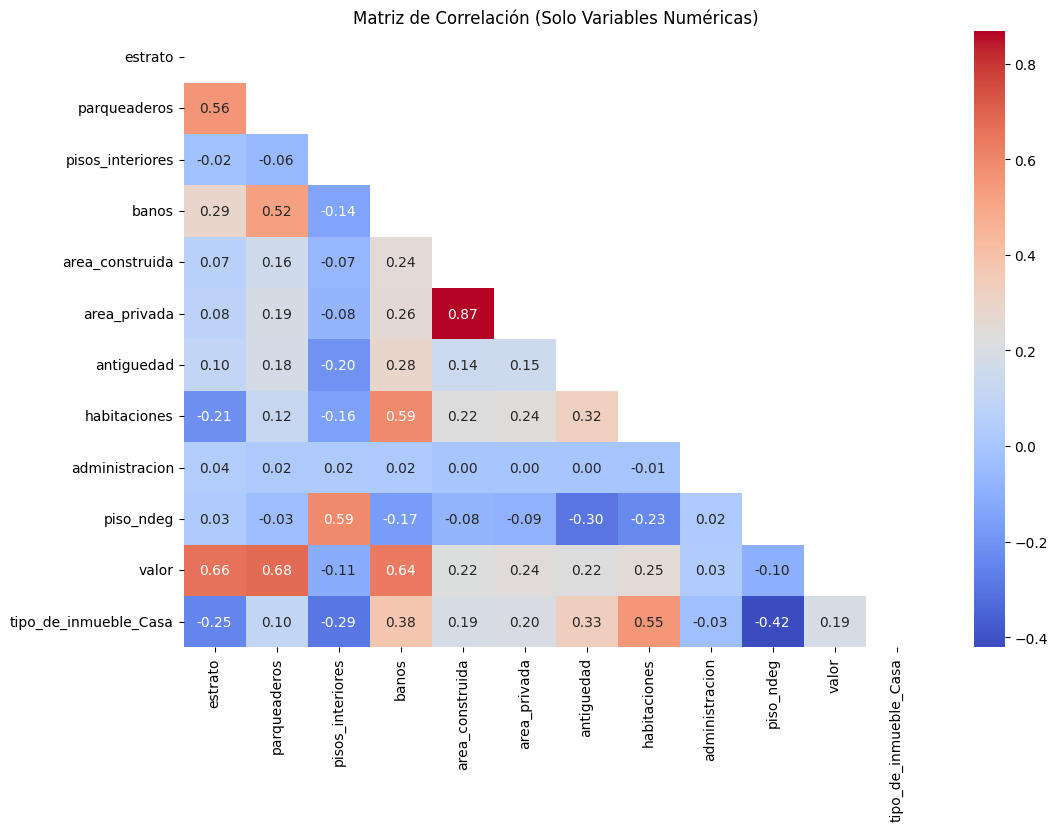

In [28]:
# Verificar las columnas que no son numéricas
non_numeric_columns = data_filter.select_dtypes(include=['object']).columns
print(f"Columnas no numéricas: {non_numeric_columns}")

# Eliminar columnas categóricas o no numéricas antes del cálculo de correlación.
# Nota: Si algunas columnas se pueden convertir, procesarlas antes.
data_numeric = data_filter.drop(columns=non_numeric_columns)

# Calcular y visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(data_numeric.corr()))
plt.title("Matriz de Correlación (Solo Variables Numéricas)")
plt.show()

In [29]:
# Evaluar variables con baja correlación.
correlation_matrix = data_filter.corr()
correlation_with_target = correlation_matrix['valor'].sort_values()

print("\nCorrelaciones con la variable objetivo 'valor':")
print(correlation_with_target)


Correlaciones con la variable objetivo 'valor':
pisos_interiores        -0.112345
piso_ndeg               -0.096582
administracion           0.033158
tipo_de_inmueble_Casa    0.189630
area_construida          0.218897
antiguedad               0.224602
area_privada             0.242814
habitaciones             0.249871
banos                    0.635129
estrato                  0.657723
parqueaderos             0.677627
valor                    1.000000
Name: valor, dtype: float64


In [30]:
# Determinar variables con baja correlación (absoluto menor a 0.1).
low_correlation_vars = correlation_with_target[abs(correlation_with_target) < 0.1].index.tolist()
print("\nVariables con baja correlación a considerar para eliminar:")
print(low_correlation_vars)

# Eliminar variables con baja correlación si se decide excluirlas.
data_filter = data_filter.drop(columns=low_correlation_vars)
print(f"\nVariables restantes después de la evaluación: {data_filter.columns.tolist()}")


Variables con baja correlación a considerar para eliminar:
['piso_ndeg', 'administracion']

Variables restantes después de la evaluación: ['estrato', 'parqueaderos', 'pisos_interiores', 'banos', 'area_construida', 'area_privada', 'antiguedad', 'habitaciones', 'valor', 'tipo_de_inmueble_Casa']


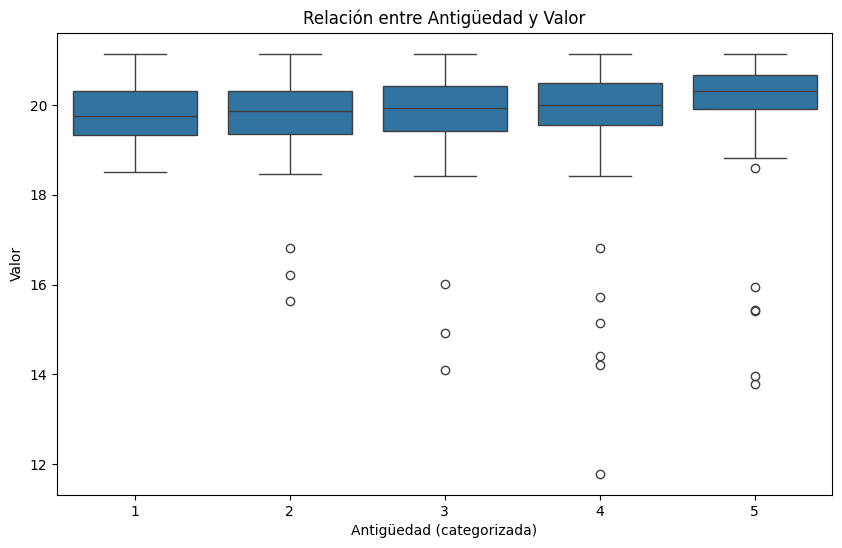

In [31]:
# Relación entre antigüedad y valor.
plt.figure(figsize=(10, 6))
sns.boxplot(x='antiguedad', y='valor', data=data_filter)
plt.title("Relación entre Antigüedad y Valor")
plt.xlabel("Antigüedad (categorizada)")
plt.ylabel("Valor")
plt.show()

In [32]:
# Separar las características y la variable objetivo
X = data_filter.drop(columns=['valor'])  # Características
y = data_filter['valor']  # Variable objetivo

In [33]:
# Dividir el conjunto en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Convertir los conjuntos en arreglos numpy si son DataFrames/Series
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)  # Convertir a matriz 2D para compatibilidad
y_test = np.array(y_test).reshape(-1, 1)

In [35]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Normalizar la variable objetivo (si es necesario)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

In [37]:
# Verificar los resultados
print("\nPrimeras filas de X_train después de la normalización:")
print(X_train[:5])

print("\nPrimeras filas de y_train después de la normalización:")
print(y_train[:5])

print(f"\nDimensiones de los conjuntos: ")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Primeras filas de X_train después de la normalización:
[[-0.95215273 -0.25825511 -0.55586888 -0.40776391 -0.19603835 -0.20915543
  -1.35077192 -0.03403755 -0.52093058]
 [ 1.48455323 -0.25825511 -0.55586888 -0.40776391 -0.11299268 -0.11795612
  -1.35077192 -1.27822313 -0.52093058]
 [-1.76438805 -1.25332406 -0.55586888 -1.26527917 -0.18937248 -0.20183508
  -0.4992938  -0.03403755  1.91964157]
 [ 1.48455323  0.73681385 -0.55586888 -0.40776391 -0.02966927 -0.02645181
   1.20366242 -0.65613034 -0.52093058]
 [-0.13991741  0.73681385 -0.19837992  3.02229711  0.40777865  0.45394586
  -0.4992938   1.21014803 -0.52093058]]

Primeras filas de y_train después de la normalización:
[[-0.72795702]
 [ 1.7269253 ]
 [-1.62280204]
 [ 1.15120265]
 [ 1.0246692 ]]

Dimensiones de los conjuntos: 
X_train: (11825, 9), y_train: (11825, 1)
X_test: (5069, 9), y_test: (5069, 1)


####**Fase 3:** Diseño, Entrenamiento y Evaluación del Modelo RNA

In [38]:
class KerasModelWrapper(BaseEstimator):
    def __init__(self, input_shape, neurons=128, dropout_rate=0.2, learning_rate=0.001, epochs=50, batch_size=32):
        self.input_shape = input_shape
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        """
        Construye la arquitectura del modelo Keras.
        """
        model = Sequential([
            layers.Input(shape=(self.input_shape,)),
            layers.Dense(self.neurons, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
            layers.Dropout(self.dropout_rate),
            layers.Dense(self.neurons // 2, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
            layers.BatchNormalization(),
            layers.Dense(1)  # Capa de salida
        ])
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
        return model

    def fit(self, X, y, **kwargs):
        """
        Entrena el modelo Keras.
        """
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, **kwargs)

    def score(self, X, y):
        """
        Evalúa el modelo Keras.
        """
        return -self.model.evaluate(X, y, verbose=0)[1]  # Retorna el MAE negativo para minimizar


In [39]:
# Función para Diseñar el Modelo
def create_model(input_shape, neurons=128, dropout_rate=0.2, learning_rate=0.001):
    """
    Define la arquitectura de la red neuronal con hiperparámetros ajustables.
    """
    model = Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(neurons, activation="relu", kernel_regularizer=regularizers.l2(0.02)),
        layers.Dropout(dropout_rate),
        layers.Dense(neurons // 2, activation="relu", kernel_regularizer=regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dense(neurons // 4, activation="relu", kernel_regularizer=regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dense(1)  # Capa de salida
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

# Función para construir el modelo con parámetros ajustables
def model_builder(neurons=128, dropout_rate=0.2, learning_rate=0.001):
    return create_model(input_shape=X_train.shape[1], neurons=neurons, dropout_rate=dropout_rate, learning_rate=learning_rate)

In [40]:
# Espacio de hiperparámetros a explorar
param_distrib = {
    'neurons': [64, 128, 256],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0001, 0.01],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150]
}

# Crear el envoltorio con parámetros iniciales
keras_wrapper = KerasModelWrapper(input_shape=X_train.shape[1])

In [41]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=keras_wrapper,
    param_distributions=param_distrib,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,       # Validación cruzada con 3 pliegues
    verbose=2,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Realizar la búsqueda
### ESTE PROCESO DURA MAS DE UNA HORA
#random_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
#print("Mejores parámetros encontrados:")
#print(random_search.best_params_)

In [42]:
# Mejores hiperparámetros encontrados (almacenados directamente)
best_params = {
    'neurons': 64,
    'learning_rate': 0.01,
    'epochs': 150,
    'dropout_rate': 0.1,
    'batch_size': 64
}

# Mostrar los mejores parámetros para referencia
print("Mejores parámetros almacenados:")
print(best_params)

Mejores parámetros almacenados:
{'neurons': 64, 'learning_rate': 0.01, 'epochs': 150, 'dropout_rate': 0.1, 'batch_size': 64}


In [43]:
# Crear el modelo final usando los mejores parámetros
final_model = create_model(X_train.shape[1],
                           neurons=best_params['neurons'],
                           dropout_rate=best_params['dropout_rate'],
                           learning_rate=best_params['learning_rate'])

In [44]:
# Definir callbacks para regular el aprendizaje
def scheduler(epoch, lr):
    if epoch > 80:
        return lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


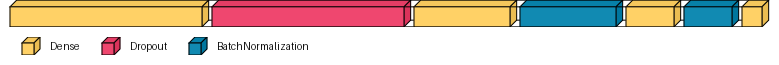

In [45]:
# Visualizar la arquitectura del modelo final
vk.layered_view(final_model, to_file="RNA_Final_Arquitectura.png", scale_xy=9, scale_z=3, legend=True)

In [46]:
# Mostrar el resumen del modelo
print("Resumen del Modelo Final:")
final_model.summary()

Resumen del Modelo Final:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 96 (384.00 B)

In [47]:
# Entrenar el modelo final
history = final_model.fit(X_train, y_train,
                          validation_split=0.2,
                          epochs=best_params['epochs'],
                          batch_size=best_params['batch_size'],
                          callbacks=[early_stopping, lr_scheduler])

Epoch 1/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.4619 - mae: 0.4626 - val_loss: 0.8867 - val_mae: 0.7148 - learning_rate: 0.0100
Epoch 2/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3116 - mae: 0.3316 - val_loss: 0.7774 - val_mae: 0.6967 - learning_rate: 0.0100
Epoch 3/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3125 - mae: 0.3343 - val_loss: 0.6120 - val_mae: 0.5913 - learning_rate: 0.0100
Epoch 4/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3073 - mae: 0.3285 - val_loss: 0.3114 - val_mae: 0.4017 - learning_rate: 0.0100
Epoch 5/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2624 - mae: 0.3234 - val_loss: 0.5077 - val_mae: 0.5663 - learning_rate: 0.0100
Epoch 6/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3085 - mae: 0.3335 - val_loss: 0.3371 - val_mae: 0.4122 - learning_rate: 0.0100
Epoch 7/150
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2615 - mae: 0.3210 - val_loss: 0.2583 - val_mae: 0.3596 - learning_rate: 0.010

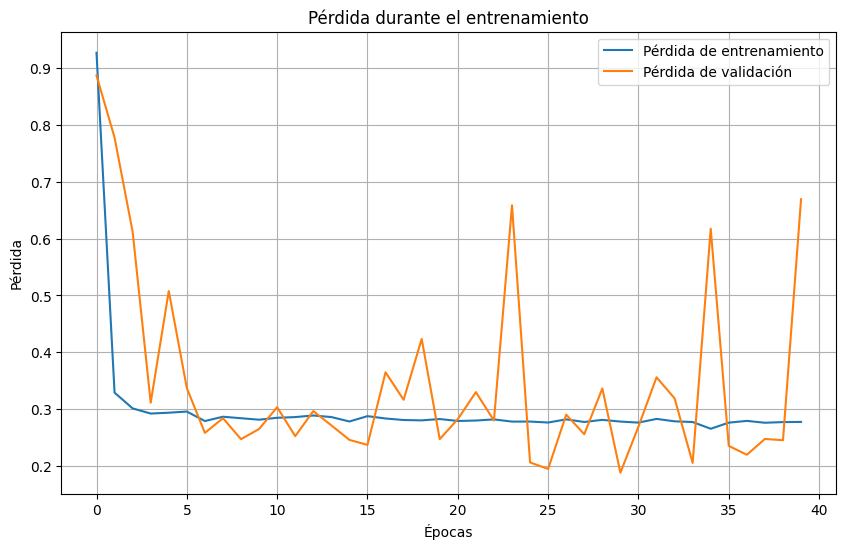

In [48]:
# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.title('Pérdida durante el entrenamiento')
plt.show()

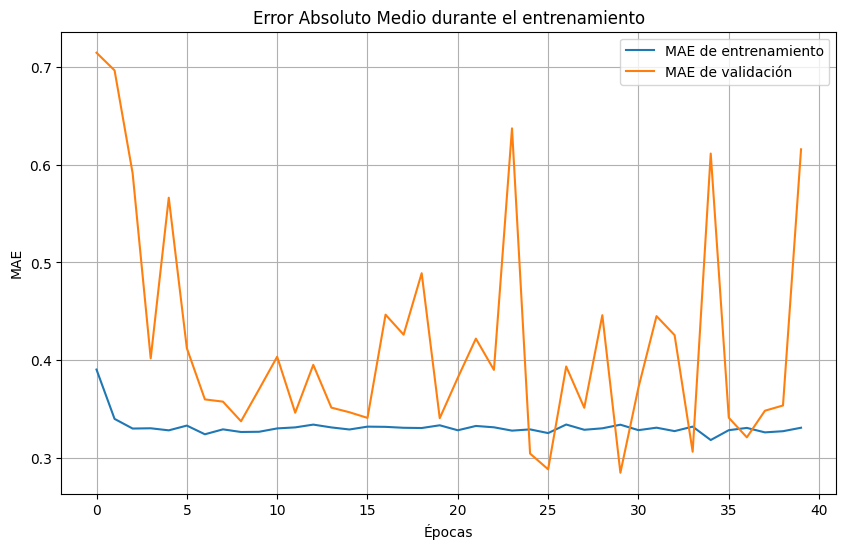

In [49]:
# Graficar el MAE durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.title('Error Absoluto Medio durante el entrenamiento')
plt.show()

In [50]:
# Obtener las predicciones del modelo
y_pred = final_model.predict(X_test)

# Desnormalizar si es necesario
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
# Verificar las dimensiones de y_test y y_pred
print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de y_pred: {y_pred.shape}")

# Asegurarse de que ambos sean unidimensionales
y_test_flat = y_test.flatten() if len(y_test.shape) > 1 else y_test
y_pred_flat = y_pred.flatten() if len(y_pred.shape) > 1 else y_pred

Dimensiones de y_test: (5069, 1)
Dimensiones de y_pred: (5069, 1)


In [52]:
# Calcular diferencias
diferencias = y_test_flat - y_pred_flat
diferencias_abs = abs(diferencias)
diferencia_porc = abs((diferencias / y_test_flat) * 100)

# Crear el DataFrame de resultados
tabla_resultados = pd.DataFrame({
    "Valor Real": y_test_flat,
    "Valor Predicho": y_pred_flat,
    "Diferencia": diferencias,
    "Diferencia Absoluta": diferencias_abs,
    "Diferencia Porcentual (%)": diferencia_porc
})

In [53]:
# Resumen de resultados
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print('\n')
print(tabla_resultados.describe())

Coeficiente de Determinación (R^2): 0.82


        Valor Real  Valor Predicho   Diferencia  Diferencia Absoluta  \
count  5069.000000     5069.000000  5069.000000          5069.000000   
mean     20.026640       19.982843     0.043798             0.185676   
std       0.628689        0.558705     0.266592             0.196233   
min      14.403298       18.536570    -6.377075             0.000127   
25%      19.583832       19.530098    -0.098979             0.069577   
50%      20.049921       20.072363     0.041102             0.148711   
75%      20.506353       20.453106     0.195784             0.259744   
max      21.141976       20.814404     1.134434             6.377075   

       Diferencia Porcentual (%)  
count                5069.000000  
mean                    0.928374  
std                     1.119357  
min                     0.000645  
25%                     0.350327  
50%                     0.741606  
75%                     1.293929  
max                    44.27

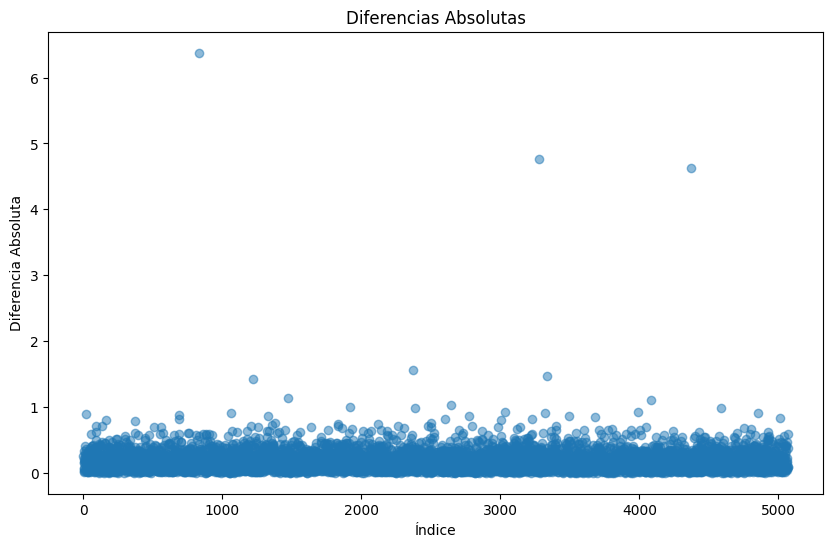

In [54]:
# Visualización de diferencias
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), diferencias_abs, alpha=0.5)
plt.title('Diferencias Absolutas')
plt.xlabel('Índice')
plt.ylabel('Diferencia Absoluta')
plt.show()

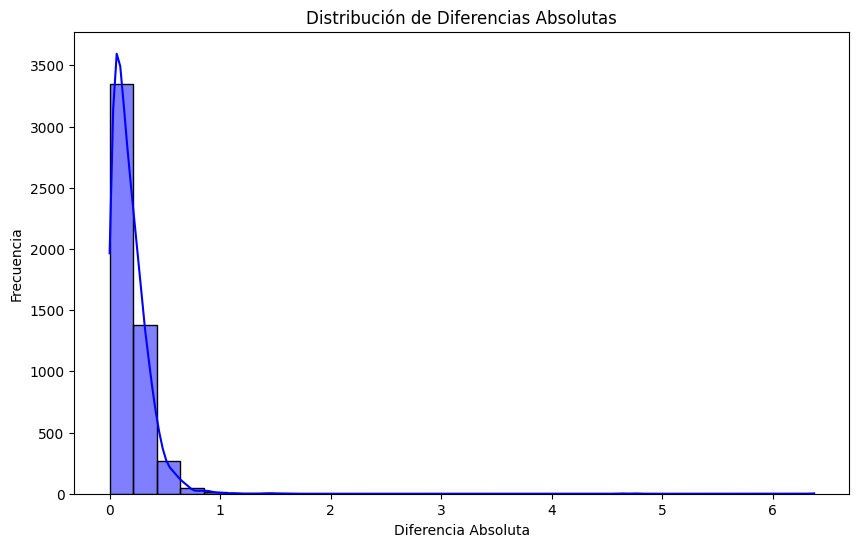

In [55]:
# Distribución de diferencias absolutas
plt.figure(figsize=(10, 6))
sns.histplot(tabla_resultados["Diferencia Absoluta"], bins=30, kde=True, color='blue')
plt.title("Distribución de Diferencias Absolutas")
plt.xlabel("Diferencia Absoluta")
plt.ylabel("Frecuencia")
plt.show()

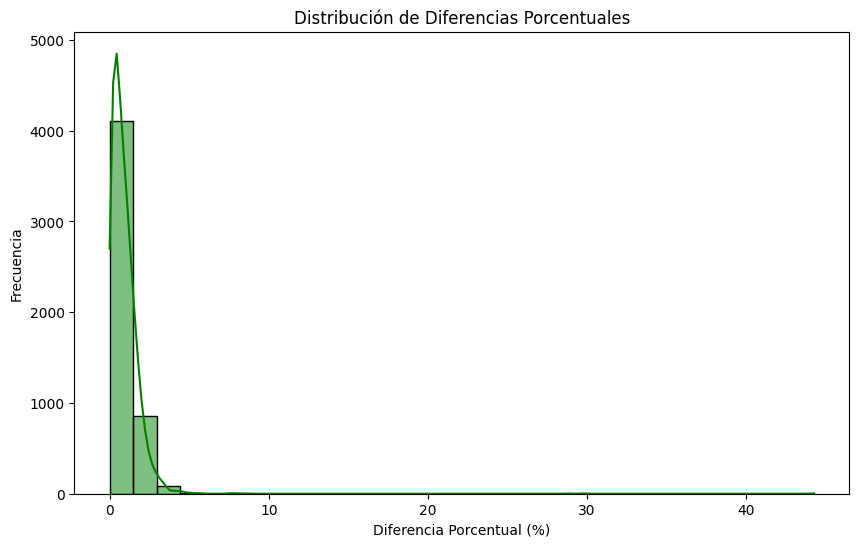

In [56]:
# Distribución de diferencias porcentuales
plt.figure(figsize=(10, 6))
sns.histplot(tabla_resultados["Diferencia Porcentual (%)"], bins=30, kde=True, color='green')
plt.title("Distribución de Diferencias Porcentuales")
plt.xlabel("Diferencia Porcentual (%)")
plt.ylabel("Frecuencia")
plt.show()

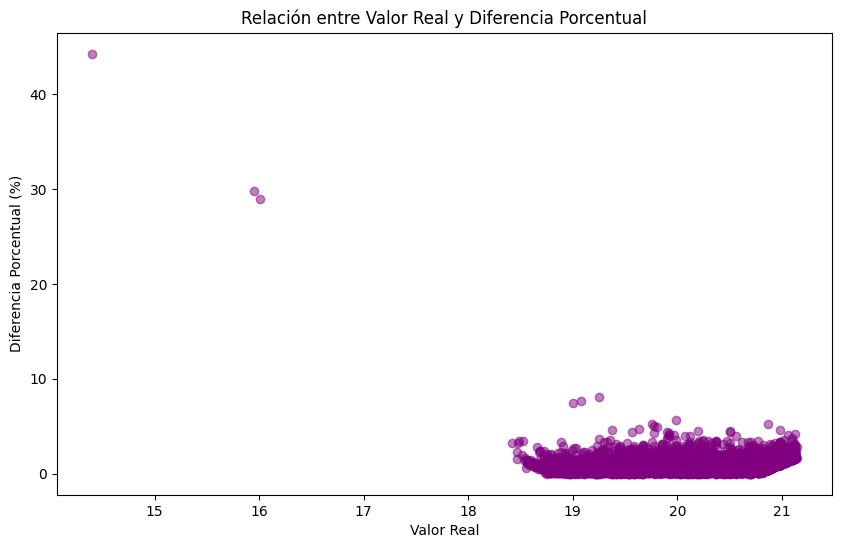

In [57]:
# Relación entre valor real y diferencia porcentual
plt.figure(figsize=(10, 6))
plt.scatter(tabla_resultados["Valor Real"], tabla_resultados["Diferencia Porcentual (%)"], alpha=0.5, color='purple')
plt.title("Relación entre Valor Real y Diferencia Porcentual")
plt.xlabel("Valor Real")
plt.ylabel("Diferencia Porcentual (%)")
plt.show()

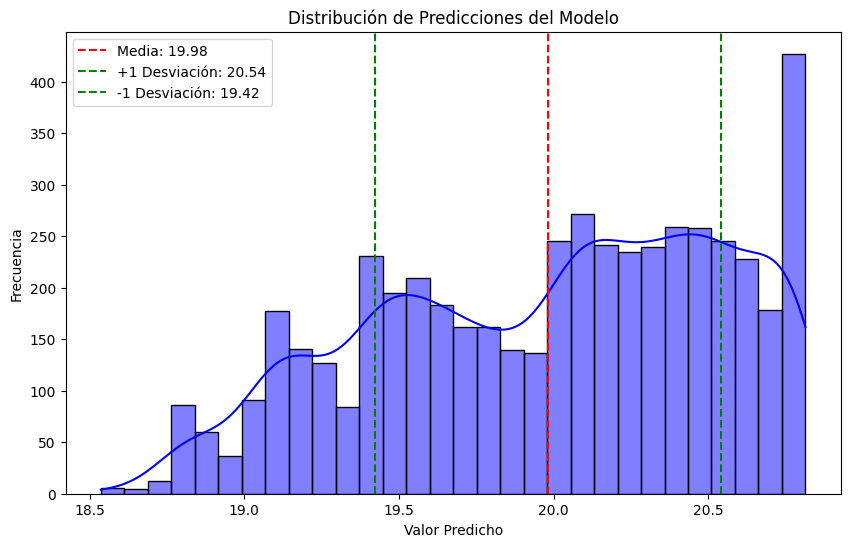

In [58]:
# Visualización con estadísticas
plt.figure(figsize=(10, 6))
sns.histplot(y_pred.flatten(), kde=True, color="blue", bins=30)
mean = np.mean(y_pred)
std = np.std(y_pred)
plt.axvline(mean, color='r', linestyle='--', label=f'Media: {mean:.2f}')
plt.axvline(mean + std, color='g', linestyle='--', label=f'+1 Desviación: {mean + std:.2f}')
plt.axvline(mean - std, color='g', linestyle='--', label=f'-1 Desviación: {mean - std:.2f}')
plt.title("Distribución de Predicciones del Modelo")
plt.xlabel("Valor Predicho")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


####**Fase 6:** Despliegue del Modelo e Interfaz de Usuario

In [59]:
# Guardar el modelo entrenado en formato HDF5
modelo_guardado = "modelo_prediccion_precios.h5"
final_model.save(modelo_guardado)
# Cargar el modelo guardado y especificar la función de pérdida
modelo = load_model(modelo_guardado, custom_objects={'mse': MeanSquaredError()})
print(f"Modelo guardado como {modelo_guardado}")

Modelo guardado como modelo_prediccion_precios.h5


In [60]:
# Función para realizar predicciones con la conversión inversa
def predecir_precio(estrato, parqueaderos, pisos_interiores, banos,
                    area_construida, area_privada, antiguedad,
                    habitaciones, tipo_de_inmueble_Casa):
    """
    Recibe las características del inmueble y devuelve el precio predicho.
    """
    try:
        # Mapear valores de antigüedad a números
        antiguedad_mapping = {
            'menor a 1 año': 1,
            '1 a 8 años': 2,
            '9 a 15 años': 3,
            '16 a 30 años': 4,
            'más de 30 años': 5
        }
        antiguedad_mapeada = antiguedad_mapping[antiguedad]

        # Crear un DataFrame con los datos ingresados
        entrada = pd.DataFrame({
            'estrato': [estrato],
            'parqueaderos': [parqueaderos],
            'pisos_interiores': [pisos_interiores],
            'banos': [banos],
            'area_construida': [area_construida],
            'area_privada': [area_privada],
            'antiguedad': [antiguedad_mapeada],
            'habitaciones': [habitaciones],
            'tipo_de_inmueble_Casa': [1 if tipo_de_inmueble_Casa else 0]
        })

        # Normalizar las características
        entrada_normalizada = scaler.transform(entrada)

        # Cargar el modelo con custom_objects
        modelo = load_model(modelo_guardado, custom_objects={'mse': MeanSquaredError()})

        # Realizar la predicción
        prediccion_normalizada = modelo.predict(entrada_normalizada)

        # Verificar el formato de la predicción
        if prediccion_normalizada.ndim > 1:
            prediccion_normalizada = prediccion_normalizada[0][0]  # Convertir a valor escalar si es necesario

        # Desnormalizar el resultado
        prediccion_logaritmica = y_scaler.inverse_transform([[prediccion_normalizada]])[0][0]

        # Convertir de escala logarítmica a la escala original
        prediccion_original = np.expm1(prediccion_logaritmica)

        return f"Precio Predicho: ${prediccion_original:,.2f}"

    except Exception as e:
        return f"Error al realizar la predicción: {str(e)}"


In [61]:
# Configurar la interfaz de usuario
interfaz = gr.Interface(
    fn=predecir_precio,
    inputs=[
        gr.Number(label="Estrato"),
        gr.Number(label="Número de Parqueaderos"),
        gr.Number(label="Número de Pisos Interiores"),
        gr.Number(label="Número de Baños"),
        gr.Number(label="Área Construida (m²)"),
        gr.Number(label="Área Privada (m²)"),
        gr.Dropdown(
            choices=['menor a 1 año', '1 a 8 años', '9 a 15 años', '16 a 30 años', 'más de 30 años'],
            label="Antigüedad"),
        gr.Number(label="Número de Habitaciones"),
        gr.Checkbox(label="¿Es una Casa?"),
    ],
    outputs=gr.Textbox(label="Predicción de Precio"),
    title="Predicción de Precios Inmobiliarios",
    description="Ingrese las características del inmueble para obtener el precio predicho."
)

para probar: https://www.fincaraiz.com.co/apartamento-en-venta/191726792

In [62]:
# Ejecutar la interfaz
interfaz.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://463a95b4c2a0b6227b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
